Here we are trying to predict whether new car released by SUV will be purchased or not by using previous data about the sales of the SUV's, they want the category of the people who bhought it.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import math 
import io
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [6]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['suv_data.csv']))
print(df.head())


X = df.iloc[:, [1,3]].values
Y = df.iloc[:,4].values

Saving suv_data.csv to suv_data (2).csv
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
print(len(df))

400


In [ ]:
sns.heatmap(df.corr())

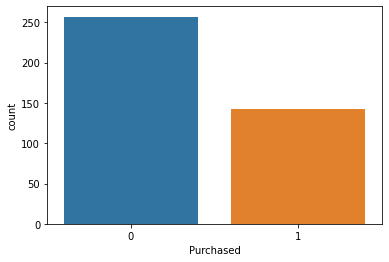

In [13]:
sns.countplot(x = 'Purchased', data = df)

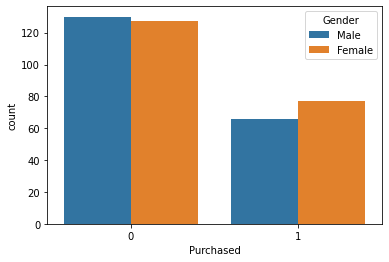

In [14]:
sns.countplot(x = 'Purchased', hue = 'Gender', data = df)

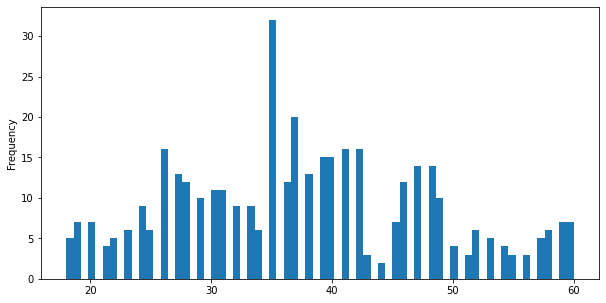

In [22]:
df["Age"].plot.hist(bins = 70,figsize = (10,5)) 
#df["Age"].plot.hist() 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [27]:
df.isnull().sum()

# if we see no null values so no need to drop any 

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

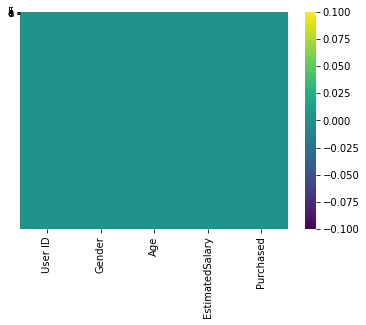

In [28]:
# see we can see no null/nan values
sns.heatmap(df.isnull(), yticklabels= "False", cmap = "viridis")


In [30]:
# we need to change this gender into categorical variable 

sex = pd.get_dummies(df["Gender"])
print(sex.head())  # here we get two columns female and male u can see but we dont want both one column is enough to say so we change it as seen in below cell


   Female  Male
0       0     1
1       0     1
2       1     0
3       1     0
4       0     1


In [31]:
gender = pd.get_dummies(df["Gender"], drop_first = True)
print(gender.head()) 

   Male
0     1
1     1
2     0
3     0
4     1


In [35]:
# we now add this column to the data frame 
df = pd.concat([df,gender], axis=1)
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased  Male  Male
0  15624510    Male   19            19000          0     1     1
1  15810944    Male   35            20000          0     1     1
2  15668575  Female   26            43000          0     0     0
3  15603246  Female   27            57000          0     0     0
4  15804002    Male   19            76000          0     1     1


In [43]:
X = df.iloc[:, [2,3,5]].values  # taking only Age column, salary andn Male thats all, as rest do not help us in any way
Y = df.iloc[:,4].values
#print(Y)
#print(X)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [53]:
# we are scaling as 1k values are present or else it will effect the accuracy a lot as it changed from 60 to 91 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [54]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [55]:
logmodel.fit(X_train,Y_train)  

LogisticRegression()

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
classification_report(Y_test,predictions) 

'              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94        58\n           1       0.89      0.77      0.83        22\n\n    accuracy                           0.91        80\n   macro avg       0.91      0.87      0.89        80\nweighted avg       0.91      0.91      0.91        80\n'

In [60]:
from sklearn.metrics import f1_score
f1_score(Y_test,predictions, average = 'weighted') # adding this weighted our accuracy got increased to 91 from 82

0.9104017216642755